[87 38 59 79 37 59 14 64 22 96]
[98 91 41 28 79 70 99 79 86  4]
759.0
Distance travled:  545.0
[59 14 59 37 79 22 96 64 38 87]
[70 99 41 79 28 86  4 79 91 98]


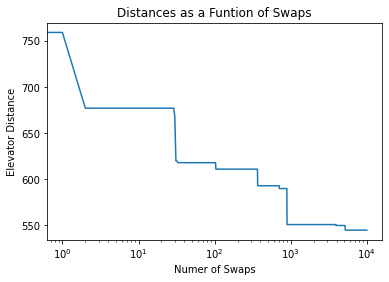

In [4]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

N = 10 # number of people                                                                         

# initalizing first and final floor arrays randomly                                               
initalF = np.random.randint(1,101,10)
finalF = np.random.randint(1,101,10)

# if a person wants to go to a floor they're already on, re randomize                             
for i in range(N):
    if initalF[i] == finalF[i]:
        initalF[i] = np.random.randint(1,101)
        print("swapped", initalF)

print(initalF)
print(finalF)

# calculating the distance between floors                                                         
def distance(N,a,b):# n = number of people, a = inital point, b = final point                     
    s = 0. #distance travled                                                                      
    for i in range(N): # loop through arrays to find the distances between each starting and final                                                                                                 
        # endpoint                                                                                
        s += abs(b[i] - a[i]) # abs b/c you don't want a - distance                               
        # everything else                                                                         
        if i < N -1:
            s += abs(a[i+1] - b[i])
    return s # distance value                                                                     
                                                                                                                                
D = distance(N,initalF,finalF) # first distance value from non swapped random arrays              
print(D)
                                                                                                                                
D_saved = [] # initalizing D_saved array                                                          


for dummy_counter in range(10000):
                                                                                                                                
    # picking 2 people to swap                                                                                                  
    i = np.random.randint(N) # person 1                                                                                         
    j = np.random.randint(N) # person 2                                                           
                                                                                                                                
    while i == j: # if the two people are the same, repick                                        
        i = np.random.randint(N)
        j = np.random.randint(N)
                                                                                                                                
    initalF[i],initalF[j] = initalF[j],initalF[i] # swapping inital floors of people 1 & 2                                      
    finalF[i],finalF[j] = finalF[j],finalF[i] # swapping final floors of people 1 & 2             
                                                                                                                                
    swapD = distance(N,initalF,finalF) # recalculate distance for swapped floors
    
    if swapD < D: # if the distance isn't better, swap back and save                              
        D = swapD
        D_saved.append(D)
    else: # if the distance is better, save                                                       
        D_saved.append(D)

print("Distance travled: ",D) # final optimized distance                                          
print(initalF) # reordered inital floor array                                                     
print(finalF) # reordered final floor array                                                       

# plotting the process                                                                            
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(len(D_saved)),D_saved)
ax.set_xscale('log')
plt.title('Distances as a Funtion of Swaps')
plt.xlabel('Numer of Swaps')
plt.ylabel('Elevator Distance')
fig.savefig('mcmc1.png',dpi=300)